In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [37]:
df = pd.read_csv('/Users/bengriffith/Documents/CurrentlyRelevant/INST414/inst.411.final-project.repo/Data/isbn13_results.csv')
df

,Unnamed: 0,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
0,0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When the Chamber of Secrets is opened again at...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE
1,1,Harry Potter and the Prisoner of Azkaban,NaN,['J. K. Rowling'],Scholastic Paperbacks,2004,During his third year at Hogwarts School for W...,9780439655484,547.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2122.0,NOT_MATURE
2,2,Harry Potter,"5 Years of Magic, Adventure, and Mystery at Ho...",['J. K. Rowling'],NaN,2004,NaN,9780439682589,0.0,NaN,NaN,4.5,13.0,NOT_MATURE
3,3,Unauthorized Harry Potter and the Deathly Hall...,Harry Potter Book Seven and Half-Blood Prince ...,['W. Frederick Zimmerman'],Nimble Books,2005-04,Through the magic of print-on-demand technolog...,9780976540601,152.0,['Fiction'],['Fiction'],3.5,11.0,NOT_MATURE
4,4,The Harry Potter Collection,The First Six Spellbinding Adventures at Hogwarts,['J. K. Rowling'],Arthur a Levine,2005-10-01,The first six years of Harry Potter magic are ...,9780439827607,NaN,['Juvenile Fiction'],['Juvenile Fiction'],4.5,16.0,NOT_MATURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,2756,El Alquimista: Edicion Illustrada,NaN,['Paulo Coelho'],Harper Collins,2007-04-10,"Exuberante, evocativo y profundamente humano, ...",9780061351341,200.0,['Fiction'],['Fiction'],5.0,2.0,NOT_MATURE
2757,2757,Call of the Mall,How We Shop,['Paco Underhill'],Profile Business,2004,"Like Underhill's bestseller, Why We Buy, this ...",9781861974426,227.0,['Consumer behavior'],['Consumer behavior'],NaN,NaN,NOT_MATURE
2758,2758,The Die Broke Financial Problem Solver,Six Steps to Overcoming All Your Money Problems,"['Stephen M. Pollan', 'Mark Levine']",Harper Paperbacks,2000-12-26,If you're loosing sleep over your financial wo...,9780066619910,272.0,['Business & Economics'],['Business & Economics'],NaN,NaN,NOT_MATURE
2759,2759,Fantastic Mr Fox,NaN,['David Wood'],Samuel French Limited,2003,Adaptation into a play of the Roald Dahl class...,9780573051333,43.0,['Drama'],['Drama'],3.0,1.0,NOT_MATURE


In [38]:
descriptions = list(df['description'])
empty = 0
full = 0
for i in descriptions:
    #print(i)
    if pd.isna(i):
        empty+=1
    else:
        full += 1
        
print(empty, full)

141 2620


In [39]:
pages = list(df['page_count'])
empty = 0
full = 0
for i in pages:
    #print(i)
    if pd.isna(i):
        empty+=1
    else:
        full += 1
        
print(empty, full)

30 2731


In [40]:
ratings = list(df['average_rating'])
empty = 0
full = 0
for i in ratings:
    #print(i)
    if pd.isna(i):
        empty+=1
    else:
        full += 1
        
print(empty, full)

783 1978


In [41]:
# Remove rows with NaNs
descrNan = df.loc[pd.isna(df['description'])]
descrNan.head()

,Unnamed: 0,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
2,2,Harry Potter,"5 Years of Magic, Adventure, and Mystery at Ho...",['J. K. Rowling'],NaN,2004,NaN,9780439682589,0.0,NaN,NaN,4.5,13.0,NOT_MATURE
92,92,The Untouchables,NaN,"['Eliot Ness', 'Oscar Fraley']",Buccaneer Books,1957,NaN,9781568491981,264.0,['Crime'],['Crime'],3.0,1.0,NOT_MATURE
117,117,The Rosy Crucifixion,NaN,['Henry Miller'],NaN,1965,NaN,9780802151780,NaN,NaN,NaN,NaN,NaN,NOT_MATURE
129,129,The Broken Wings,NaN,['Kahlil Gibran'],NaN,1994,NaN,9780806501901,128.0,NaN,NaN,NaN,NaN,NOT_MATURE
170,170,The New York Trilogy: The locked room,NaN,['Paul Auster'],NaN,1985,NaN,9780940650763,NaN,NaN,NaN,3.0,1.0,NOT_MATURE


In [42]:
pagesNan = df.loc[pd.isna(df['page_count'])]
pagesNan.head()

,Unnamed: 0,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
4,4,The Harry Potter Collection,The First Six Spellbinding Adventures at Hogwarts,['J. K. Rowling'],Arthur a Levine,2005-10-01,The first six years of Harry Potter magic are ...,9780439827607,NaN,['Juvenile Fiction'],['Juvenile Fiction'],4.5,16.0,NOT_MATURE
117,117,The Rosy Crucifixion,NaN,['Henry Miller'],NaN,1965,NaN,9780802151780,NaN,NaN,NaN,NaN,NaN,NOT_MATURE
170,170,The New York Trilogy: The locked room,NaN,['Paul Auster'],NaN,1985,NaN,9780940650763,NaN,NaN,NaN,3.0,1.0,NOT_MATURE
232,232,The Five Love Languages,And Five Love Journal- Gift Package,['Gary Chapman'],Moody Publishers,2005-01-01,NaN,9780802415318,NaN,['Family & Relationships'],['Family & Relationships'],NaN,NaN,NOT_MATURE
291,291,Eclogues. Georgics. Aeneid,Books 1-6,['Virgil'],NaN,1999,NaN,9780674995833,NaN,NaN,NaN,NaN,NaN,NOT_MATURE


In [43]:
ratingsNan = df.loc[pd.isna(df['ratings_count'])]
ratingsNan.head()

,Unnamed: 0,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
26,26,A Guide for Using Hatchet in the Classroom,NaN,['Donna Ickes'],Teacher Created Resources,1994-08,Teaching literature unit based on the popular ...,9781557344496,50.0,['Activity programs in education'],['Activity programs in education'],NaN,NaN,NOT_MATURE
28,28,Molly Hatchet,"5 of the Best : [guitar, Vocal].",['Molly Hatchet'],Cherry Lane Music,2003,(Play It Like It Is). Molly Hatchet is one of ...,9781575606248,0.0,['Guitar music (Rock)'],['Guitar music (Rock)'],NaN,NaN,NOT_MATURE
30,30,A Changeling for All Seasons,NaN,"['Angela Knight', 'Kate Douglas', 'Shelby Morg...",Changeling PressLlc,2005-10-01,A Changeling For All Seasons Ten unforgettable...,9781595962805,304.0,['Fiction'],['Fiction'],NaN,NaN,NOT_MATURE
33,33,The Changeling,A Novel,['Kate Horsley'],National Geographic Books,2005-04-12,"Here, the author of the acclaimed Confessions ...",9781590301944,0.0,['Fiction'],['Fiction'],NaN,NaN,NOT_MATURE
38,38,Artesia: Adventures In The Known World RPG,NaN,['Mark Smylie'],Archaia,2009-07-15,The award-winning graphic novel Artesia comes ...,9781932386103,0.0,['Games & Activities'],['Games & Activities'],NaN,NaN,NOT_MATURE


In [44]:
indexNan = []
for i in descrNan.index:
    indexNan.append(i)
for i in pagesNan.index:
    indexNan.append(i)
for i in ratingsNan.index:
    indexNan.append(i)


In [45]:
indexNan = [*set(indexNan)]

In [46]:
indexNan.sort()


In [47]:
indexNan

[2,
 4,
 26,
 28,
 30,
 33,
 38,
 40,
 48,
 51,
 53,
 54,
 56,
 67,
 69,
 70,
 72,
 74,
 75,
 79,
 80,
 83,
 84,
 87,
 89,
 91,
 92,
 94,
 95,
 96,
 100,
 101,
 112,
 117,
 122,
 127,
 128,
 129,
 132,
 133,
 134,
 135,
 138,
 142,
 150,
 156,
 157,
 170,
 171,
 176,
 180,
 185,
 190,
 192,
 193,
 205,
 207,
 208,
 214,
 222,
 223,
 232,
 238,
 239,
 245,
 251,
 253,
 262,
 263,
 267,
 271,
 278,
 280,
 281,
 282,
 284,
 286,
 291,
 292,
 294,
 295,
 304,
 305,
 307,
 309,
 315,
 316,
 317,
 319,
 320,
 321,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 332,
 333,
 334,
 336,
 337,
 339,
 343,
 345,
 350,
 351,
 352,
 353,
 354,
 355,
 358,
 359,
 360,
 366,
 371,
 375,
 376,
 380,
 381,
 382,
 383,
 387,
 395,
 400,
 403,
 411,
 414,
 416,
 421,
 425,
 426,
 427,
 430,
 431,
 432,
 434,
 441,
 443,
 444,
 457,
 458,
 459,
 462,
 464,
 465,
 466,
 471,
 476,
 478,
 480,
 481,
 486,
 487,
 488,
 489,
 490,
 491,
 494,
 496,
 501,
 504,
 506,
 511,
 512,
 513,
 515,
 519,
 524,
 525,
 531,


In [52]:
df2 = df.copy()
for i in indexNan:
    df2 = df2.drop([i])

In [53]:
df2.head()

,Unnamed: 0,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
0,0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When the Chamber of Secrets is opened again at...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE
1,1,Harry Potter and the Prisoner of Azkaban,NaN,['J. K. Rowling'],Scholastic Paperbacks,2004,During his third year at Hogwarts School for W...,9780439655484,547.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2122.0,NOT_MATURE
3,3,Unauthorized Harry Potter and the Deathly Hall...,Harry Potter Book Seven and Half-Blood Prince ...,['W. Frederick Zimmerman'],Nimble Books,2005-04,Through the magic of print-on-demand technolog...,9780976540601,152.0,['Fiction'],['Fiction'],3.5,11.0,NOT_MATURE
5,5,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story,['Douglas Adams'],Gramercy,2005,6 Science fiction-romaner.,9780517226957,844.0,"['Dent, Arthur (Fictitious character)']","['Dent, Arthur (Fictitious character)']",4.5,35.0,NOT_MATURE
6,6,The Ultimate Hitchhiker's Guide to the Galaxy,Five Novels in One Outrageous Volume,['Douglas Adams'],National Geographic Books,2002-04-30,"In one complete volume, here are the five clas...",9780345453747,0.0,['Fiction'],['Fiction'],4.0,95.0,NOT_MATURE


In [54]:
df2.reset_index(inplace=True)
df2.drop(columns=['index', 'Unnamed: 0'], inplace=True)
df2

,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When the Chamber of Secrets is opened again at...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE
1,Harry Potter and the Prisoner of Azkaban,NaN,['J. K. Rowling'],Scholastic Paperbacks,2004,During his third year at Hogwarts School for W...,9780439655484,547.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2122.0,NOT_MATURE
2,Unauthorized Harry Potter and the Deathly Hall...,Harry Potter Book Seven and Half-Blood Prince ...,['W. Frederick Zimmerman'],Nimble Books,2005-04,Through the magic of print-on-demand technolog...,9780976540601,152.0,['Fiction'],['Fiction'],3.5,11.0,NOT_MATURE
3,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story,['Douglas Adams'],Gramercy,2005,6 Science fiction-romaner.,9780517226957,844.0,"['Dent, Arthur (Fictitious character)']","['Dent, Arthur (Fictitious character)']",4.5,35.0,NOT_MATURE
4,The Ultimate Hitchhiker's Guide to the Galaxy,Five Novels in One Outrageous Volume,['Douglas Adams'],National Geographic Books,2002-04-30,"In one complete volume, here are the five clas...",9780345453747,0.0,['Fiction'],['Fiction'],4.0,95.0,NOT_MATURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Artemis Fowl,NaN,['eoin colfer'],NaN,2004,In order to free his father from the Russian M...,9781400085910,343.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,32.0,NOT_MATURE
1920,El Alquimista,Una Fabula Para Seguir Tus Suenos,['Paulo Coelho'],Harper Collins,1994-10-07,"La mÁgica historia de Paulo Coelho, que trata ...",9780062511409,196.0,['Fiction'],['Fiction'],5.0,4.0,NOT_MATURE
1921,El Alquimista: Edicion Illustrada,NaN,['Paulo Coelho'],Harper Collins,2007-04-10,"Exuberante, evocativo y profundamente humano, ...",9780061351341,200.0,['Fiction'],['Fiction'],5.0,2.0,NOT_MATURE
1922,Fantastic Mr Fox,NaN,['David Wood'],Samuel French Limited,2003,Adaptation into a play of the Roald Dahl class...,9780573051333,43.0,['Drama'],['Drama'],3.0,1.0,NOT_MATURE


In [56]:
# removed stop words from descriptions
#import nltk
#nltk.download()
#from nltk.corpus import stopwords as sw
sw = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 
      'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 
      'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 
      'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 
      'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 
      'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 
      'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 
      'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 
      'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

In [57]:
descrips = list(df2['description'])
no_stop_words = []

for i in descrips:
    new = []
    for j in i.split(' '):
        if j in sw:
            pass
        else:
            new.append(j)
        string = ' '.join(new)
    no_stop_words.append(string)

In [58]:
no_stop_words[:5]

['When Chamber Secrets opened Hogwarts School Witchcraft Wizardry, second-year student Harry Potter finds danger dark power released school.',
 "During third year Hogwarts School Witchcraft Wizardry, Harry Potter must confront devious dangerous wizard responsible parents' deaths.",
 'Through magic print-on-demand technology, "nimble" guide work best-selling author J. K. Rowling provides latest news author works, updated whenever significant developments. Unlike conventional book, editions printed quantity every couple years, "living book" goes frequent "mini-editions" printed fresh whenever customers place order. Purchasers entitled free PDF updates! An entirely new section analysis 75 new pages added shortly release "Harry Potter Half-Blood Prince" July 16, 2005.',
 '6 Science fiction-romaner.',
 'In one complete volume, five classic novels Douglas Adams’s beloved Hitchhiker series. Now celebrating pivotal 42nd anniversary The Hitchhiker’s Guide Galaxy, soon Hulu original series! The 

In [59]:
df2['description'] = no_stop_words
df2

,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When Chamber Secrets opened Hogwarts School Wi...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE
1,Harry Potter and the Prisoner of Azkaban,NaN,['J. K. Rowling'],Scholastic Paperbacks,2004,During third year Hogwarts School Witchcraft W...,9780439655484,547.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2122.0,NOT_MATURE
2,Unauthorized Harry Potter and the Deathly Hall...,Harry Potter Book Seven and Half-Blood Prince ...,['W. Frederick Zimmerman'],Nimble Books,2005-04,"Through magic print-on-demand technology, ""nim...",9780976540601,152.0,['Fiction'],['Fiction'],3.5,11.0,NOT_MATURE
3,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story,['Douglas Adams'],Gramercy,2005,6 Science fiction-romaner.,9780517226957,844.0,"['Dent, Arthur (Fictitious character)']","['Dent, Arthur (Fictitious character)']",4.5,35.0,NOT_MATURE
4,The Ultimate Hitchhiker's Guide to the Galaxy,Five Novels in One Outrageous Volume,['Douglas Adams'],National Geographic Books,2002-04-30,"In one complete volume, five classic novels Do...",9780345453747,0.0,['Fiction'],['Fiction'],4.0,95.0,NOT_MATURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Artemis Fowl,NaN,['eoin colfer'],NaN,2004,"In order free father Russian Mafiya, Artemis m...",9781400085910,343.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,32.0,NOT_MATURE
1920,El Alquimista,Una Fabula Para Seguir Tus Suenos,['Paulo Coelho'],Harper Collins,1994-10-07,"La mÁgica historia de Paulo Coelho, que trata ...",9780062511409,196.0,['Fiction'],['Fiction'],5.0,4.0,NOT_MATURE
1921,El Alquimista: Edicion Illustrada,NaN,['Paulo Coelho'],Harper Collins,2007-04-10,"Exuberante, evocativo y profundamente humano, ...",9780061351341,200.0,['Fiction'],['Fiction'],5.0,2.0,NOT_MATURE
1922,Fantastic Mr Fox,NaN,['David Wood'],Samuel French Limited,2003,Adaptation play Roald Dahl classic three farme...,9780573051333,43.0,['Drama'],['Drama'],3.0,1.0,NOT_MATURE


In [60]:
# sort data frame on rating
sortedratings = df2.sort_values(by=['average_rating', 'ratings_count'], ascending=False)

In [61]:
# drop 5.0 ratings
fivestar = sortedratings.loc[sortedratings['average_rating'] == 5.0]
i = list(fivestar.index)
sorted4under = sortedratings.drop(i)

In [62]:
sorted4under

,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
275,John Adams,NaN,['David McCullough'],Simon & Schuster,2002-09-03,"The Pulitzer Prize–winning, bestselling biogra...",9780743223133,788.0,['Biography & Autobiography'],['Biography & Autobiography'],4.5,3628.0,NOT_MATURE
737,On Writing,A Memoir of the Craft,['Stephen King'],NaN,2001,An autobiographical portrait Stephen King's ho...,9780340820469,367.0,"['Authors, American']","['Authors, American']",4.5,3550.0,NOT_MATURE
1056,Gone with the Wind,NaN,['Margaret Mitchell'],Macmillan Company of Canada,1936,New York Times Book Review.,9780446675536,1052.0,['African Americans'],['African Americans'],4.5,2996.0,NOT_MATURE
0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When Chamber Secrets opened Hogwarts School Wi...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE
312,To Kill a Mockingbird (slipcased edition),NaN,['Harper Lee'],Harper Collins,2006-10-17,"At age eight, Scout Finch entrenched free-thin...",9780061205699,338.0,['Fiction'],['Fiction'],4.5,2146.0,NOT_MATURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,Dune,The Battle of Corrin,['Kevin J. Anderson'],NaN,2004,Science fiction roman.,9780340823378,620.0,['Dune (Imaginary place)'],['Dune (Imaginary place)'],1.0,1.0,NOT_MATURE
1303,Amarse Con Los Ojos Abiertos/to Love With Eyes...,NaN,"['Jorge Bucay', 'Silvia Salinas']",Rba Publicaciones Editores revistas,2003,“Amar con los ojos cerrados es amar como un ci...,9788479019396,237.0,['Self-Help'],['Self-Help'],1.0,1.0,NOT_MATURE
1364,Data Structures and Algorithm Analysis in C++,NaN,['Mark Allen Weiss'],Addison Wesley Publishing Company,2006,Mark Allen Weiss' innovative approach algorith...,9780321441461,0.0,['Computers'],['Computers'],1.0,1.0,NOT_MATURE
1433,The War of the Lance,NaN,"['Margaret Weis', 'Tracy Hickman']",NaN,2005,Presents history war followers Takhisis minion...,9780786937776,343.0,['Fiction'],['Fiction'],1.0,1.0,NOT_MATURE


In [63]:
df3 = pd.get_dummies(df2)

In [64]:
df5 = pd.get_dummies(sorted4under)

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD 

In [65]:
matrix_dense = df3.to_numpy()

In [66]:
matrix_dense1 = df5.to_numpy()

In [67]:
df3

,isbn_13,page_count,average_rating,ratings_count,"title_""Surely You're Joking, Mr. Feynman!""",title_$30 Film School,title_'Salem's Lot,title_100 Love Sonnets,title_100 Years of Lynchings,title_1968,...,categories_['Travel'],categories_['Trees'],categories_['True Crime'],categories_['Turtles as pets'],categories_['United States'],"categories_['Vietnam War, 1961-1975']",categories_['Women'],categories_['Young Adult Fiction'],maturity_rating_MATURE,maturity_rating_NOT_MATURE
0,9780439554893,341.0,4.5,2273.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9780439655484,547.0,4.5,2122.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9780976540601,152.0,3.5,11.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9780517226957,844.0,4.5,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9780345453747,0.0,4.0,95.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,9781400085910,343.0,4.5,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920,9780062511409,196.0,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1921,9780061351341,200.0,5.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1922,9780573051333,43.0,3.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
svd = TruncatedSVD(n_components=2)

In [69]:
svd.fit(matrix_dense)

TruncatedSVD()

In [70]:
svd.fit(matrix_dense1)

TruncatedSVD()

In [73]:
#matrix_reduced = svd.transform(matrix_dense)

In [72]:
matrix_reduced1 = svd.transform(matrix_dense1)

In [41]:
#np.mean(matrix_reduced, axis=0)

array([9.78070558e+12, 1.33406728e-03])

In [74]:
np.mean(matrix_reduced1, axis=0)

array([9.78068827e+12, 1.29574336e-03])

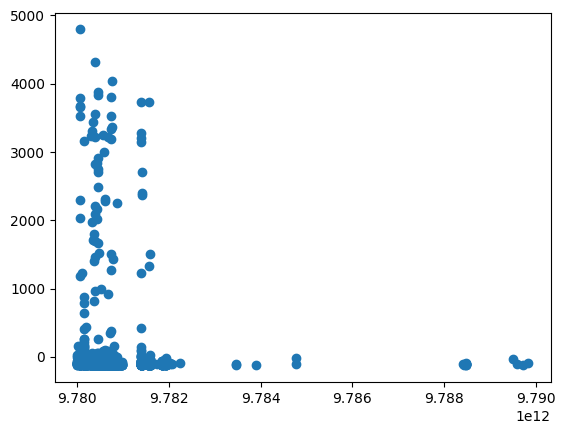

In [44]:
#plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1])

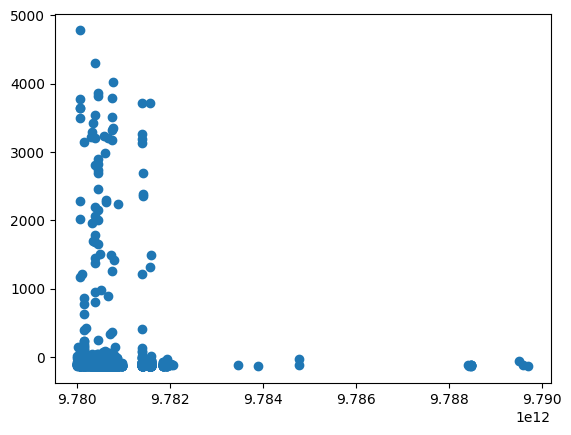

In [75]:
plt.scatter(matrix_reduced1[:,0], matrix_reduced1[:,1])

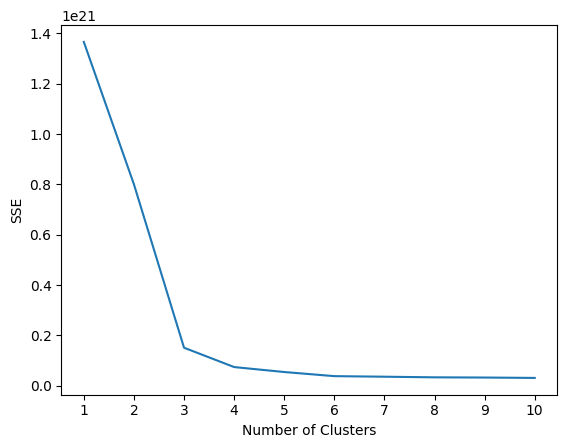

In [49]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()#

In [76]:
# Cluster
k = 3


In [54]:
#cluster_model = KMeans(n_clusters=k)

In [77]:
cluster_model1 = KMeans(n_clusters=k)

In [55]:
#cluster_model.fit(matrix_reduced)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [78]:
cluster_model1.fit(matrix_reduced1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [79]:
#df3['cluster'] = cluster_model.labels_
#df2['cluster'] = cluster_model.labels_
df5['cluster'] = cluster_model1.labels_

In [80]:
#df3['cluster'].value_counts()

In [65]:
df2

,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating,cluster
0,Harry Potter and the Chamber of Secrets,NaN,"['J. K. Rowling', 'Mary GrandPre']",Arthur a Levine,2003,When Chamber Secrets opened Hogwarts School Wi...,9780439554893,341.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2273.0,NOT_MATURE,0
1,Harry Potter and the Prisoner of Azkaban,NaN,['J. K. Rowling'],Scholastic Paperbacks,2004,During third year Hogwarts School Witchcraft W...,9780439655484,547.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,2122.0,NOT_MATURE,0
2,Unauthorized Harry Potter and the Deathly Hall...,Harry Potter Book Seven and Half-Blood Prince ...,['W. Frederick Zimmerman'],Nimble Books,2005-04,"Through magic print-on-demand technology, ""nim...",9780976540601,152.0,['Fiction'],['Fiction'],3.5,11.0,NOT_MATURE,0
3,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story,['Douglas Adams'],Gramercy,2005,6 Science fiction-romaner.,9780517226957,844.0,"['Dent, Arthur (Fictitious character)']","['Dent, Arthur (Fictitious character)']",4.5,35.0,NOT_MATURE,0
4,The Ultimate Hitchhiker's Guide to the Galaxy,Five Novels in One Outrageous Volume,['Douglas Adams'],National Geographic Books,2002-04-30,"In one complete volume, five classic novels Do...",9780345453747,0.0,['Fiction'],['Fiction'],4.0,95.0,NOT_MATURE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Artemis Fowl,NaN,['eoin colfer'],NaN,2004,"In order free father Russian Mafiya, Artemis m...",9781400085910,343.0,['Juvenile Fiction'],['Juvenile Fiction'],4.5,32.0,NOT_MATURE,2
1920,El Alquimista,Una Fabula Para Seguir Tus Suenos,['Paulo Coelho'],Harper Collins,1994-10-07,"La mÁgica historia de Paulo Coelho, que trata ...",9780062511409,196.0,['Fiction'],['Fiction'],5.0,4.0,NOT_MATURE,0
1921,El Alquimista: Edicion Illustrada,NaN,['Paulo Coelho'],Harper Collins,2007-04-10,"Exuberante, evocativo y profundamente humano, ...",9780061351341,200.0,['Fiction'],['Fiction'],5.0,2.0,NOT_MATURE,0
1922,Fantastic Mr Fox,NaN,['David Wood'],Samuel French Limited,2003,Adaptation play Roald Dahl classic three farme...,9780573051333,43.0,['Drama'],['Drama'],3.0,1.0,NOT_MATURE,0


In [81]:
#plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1], c=df3["cluster"])

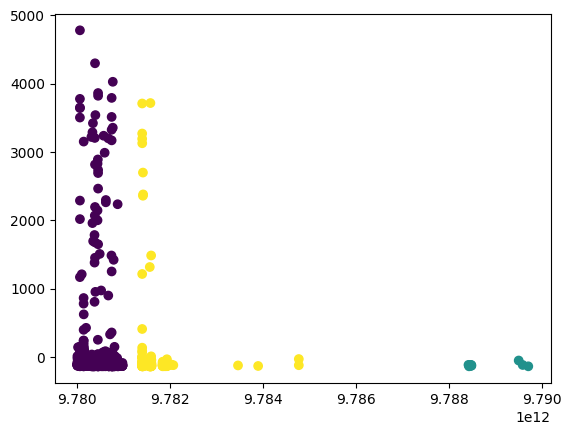

In [82]:
plt.scatter(matrix_reduced1[:,0], matrix_reduced1[:,1], c=df5["cluster"])

In [83]:
import statistics as stat

In [84]:
for cluster, cluster_group in df2.groupby('cluster'):
    print('Cluster: ', cluster)
    
    sample_size = min(cluster_group.shape[0], 20)
    
    books = df2.loc[df2['cluster'] == cluster]
    #books = df2.loc[df2['isbn_13'] == books.isbn_13[i]]
    
    print('\t', 'Rating:')
    #i = 0
    #while i < 5:
    print('\t\t', stat.mean(list(books.average_rating)))
        #i+=1
        
    print('\t', 'Page Count:')
    #i = 0
    #while i < 5:
    print('\t\t', stat.mean(list(books.page_count)))
    #    i+=1
        
    #print('\t', 'Maturity Rating:')
    #i = 0
    #while i < 5:
    #    print('\t\t', books.maturity_rating[i])
    #    i+=1


KeyError: 'cluster'

In [86]:
for cluster, cluster_group in df5.groupby('cluster'):
    print('Cluster: ', cluster)
    
    sample_size = min(cluster_group.shape[0], 20)
    
    books = df5.loc[df5['cluster'] == cluster]
    #books = df2.loc[df2['isbn_13'] == books.isbn_13[i]]
    
    print('\t', 'Rating:')
    #i = 0
    #while i < 5:
    print('\t\t', stat.mean(list(books.average_rating)))
        #i+=1
        
    print('\t', 'Page Count:')
    #i = 0
    #while i < 5:
    print('\t\t', stat.mean(list(books.page_count)))
    #    i+=1
        
    #print('\t', 'Maturity Rating:')
    #i = 0
    #while i < 5:
    #    print('\t\t', books.maturity_rating[i])
    #    i+=1

Cluster:  0
	 Rating:
		 3.6861777150916786
	 Page Count:
		 320.47672778561355
Cluster:  1
	 Rating:
		 3.3181818181818183
	 Page Count:
		 276.72727272727275
Cluster:  2
	 Rating:
		 3.688679245283019
	 Page Count:
		 258.48301886792456


# Perform a similarity test

In [87]:
from sklearn.metrics import DistanceMetric

isbns = list(sorted4under.isbn_13)
sims = []
for n in isbns:
    s = []
    book = df5.loc[df5['isbn_13'] == n]
    #stats_df = df2.drop(columns=['Name', 'Team'])
    for col in book:
        l = list(book[col])
        s.append(l[0])
    sims.append(s)

In [88]:
dist = DistanceMetric.get_metric('euclidean')
sims = dist.pairwise(sims)

In [89]:
test_sims = {}
for i in range(len(sims)):
    test_sims[isbns[i]] = sims[i][0]

In [90]:
top5 = sorted(test_sims.items(), key=lambda x:x[1])[0:6]

In [91]:
for i in top5:
    print(i)

(9780743223133, 0.0)
(9780743222983, 3652.18568120516)
(9780743216395, 7646.996550934229)
(9780743206051, 17470.003813680178)
(9780743203586, 19880.26657265943)
(9780743203043, 20414.03891933196)


In [96]:
# convert isbns to titles
for i in top5:
    titledf = sorted4under.loc[sorted4under['isbn_13'] == i[0]]
    title = list(titledf['title'])[0]
    print(f"{title}: {i[1]}")

John Adams: 0.0
Authentic Happiness: 3652.18568120516
Three Plums In One: 7646.996550934229
Kitchen Privileges: 17470.003813680178
The Most Of P.G. Wodehouse: 19880.26657265943
Bowling Alone: 20414.03891933196


In [114]:
top5df = sorted4under.loc[(sorted4under['isbn_13'] == 9780743223133) | (sorted4under['isbn_13'] == 9780743222983) | (sorted4under['isbn_13'] == 9780743216395)
                          | (sorted4under['isbn_13'] == 9780743206051) | (sorted4under['isbn_13'] == 9780743203586) | (sorted4under['isbn_13'] == 9780743203043)]

In [115]:
top5df

,title,subtitle,authors,publisher,publishdate,description,isbn_13,page_count,main_categories,categories,average_rating,ratings_count,maturity_rating
275,John Adams,NaN,['David McCullough'],Simon & Schuster,2002-09-03,"The Pulitzer Prize–winning, bestselling biogra...",9780743223133,788.0,['Biography & Autobiography'],['Biography & Autobiography'],4.5,3628.0,NOT_MATURE
965,The Most Of P.G. Wodehouse,NaN,['P.G. Wodehouse'],Simon and Schuster,2000-11,This lavish collection ever published incompar...,9780743203586,708.0,['Fiction'],['Fiction'],4.5,4.0,NOT_MATURE
524,Three Plums In One,"One for the Money, Two for the Dough, Three to...",['Janet Evanovich'],Simon and Schuster,2001-04-26,Collects first three mysteries featuring Trent...,9780743216395,809.0,['Fiction'],['Fiction'],4.0,12.0,NOT_MATURE
1366,Authentic Happiness,Using the New Positive Psychology to Realize Y...,['Martin E. P. Seligman'],Simon and Schuster,2004,"Argues happiness learned cultivated behavior, ...",9780743222983,336.0,['Psychology'],['Psychology'],4.0,7.0,NOT_MATURE
129,Bowling Alone,The Collapse and Revival of American Community,['Robert D. Putnam'],Simon and Schuster,2000,"Shows changes work, family structure, women's ...",9780743203043,550.0,['History'],['History'],3.5,13.0,NOT_MATURE
1849,Kitchen Privileges,A Memoir,['Mary Higgins Clark'],NaN,2002,"In memoir growing Bronx Depression, author rec...",9780743206051,232.0,['Biography & Autobiography'],['Biography & Autobiography'],3.0,9.0,NOT_MATURE


# Old stuff

In [94]:
#kaggle_data = pd.read_csv("books.csv")  # read the Kaggle books dataset
#isbn_13 = kaggle_data['isbn13']         # extract the ISBN-13 column

#isbn_13.shape 

In [3]:
# create an empty list to store the book data
#book_data_list = []
#url_base = 'https://www.googleapis.com/books/v1/volumes?q=isbn:'

# iterate over the ISBN 13 numbers, and get the information we need using the Google Books API
#for i, isbn in enumerate(isbn_13):

    # generate the URL for the Google Books API search 
#    url = url_base + isbn

    # get the book data; convert it to a dictionary using .json()
#    book_data = requests.get(url).json()

    #print(f'{i} {isbn}: {book_data.keys()}', end=': ')
    
#    if 'totalItems' in book_data and book_data['totalItems'] > 0:

        #print(book_data['totalItems'], end=': ')
        #print(book_data['items'][0]['volumeInfo']['title'], end='')
        # extract the relevant fields and create a new row in the DataFrame
#        book = {
#            'title': book_data['items'][0]['volumeInfo'].get('title', ''),
#            'subtitle': book_data['items'][0]['volumeInfo'].get('subtitle', ''),
#            'authors': book_data['items'][0]['volumeInfo'].get('authors', ''),
#            'publisher': book_data['items'][0]['volumeInfo'].get('publisher', ''),
#            'publishdate': book_data['items'][0]['volumeInfo'].get('publishedDate', ''),
#            'description': book_data['items'][0]['volumeInfo'].get('description', ''),
#            'isbn_13': isbn,
#            'page_count': book_data['items'][0]['volumeInfo'].get('pageCount', ''),
#           'main_categories': book_data['items'][0]['volumeInfo'].get('mainCategory', ''),
#           'categories': book_data['items'][0]['volumeInfo'].get('categories', ''),
#            'average_rating': book_data['items'][0]['volumeInfo'].get('averageRating', ''),
#            'ratings_count': book_data['items'][0]['volumeInfo'].get('ratingsCount', ''),
#            'maturity_rating': book_data['items'][0]['volumeInfo'].get('maturityRating', '')
#        }

        # append the new dictionary to the book_data_list
#        book_data_list.append(book)
#    else:

        # handle the case where no results were returned for the ISBN-13 number
        # print(f"No results found for ISBN-13 {isbn}")
#        pass
    
    #print()

# convert the list of dictionaries to a DataFrame
#response_df = pd.DataFrame(book_data_list)

In [4]:
#response_df.head(6)

In [5]:
#mainCats = []
#cats = []

#for item in response_df['categories']:
#    if len(item) == 1:
#        catss = item[0].split(',')
#        mainCats.append(catss[0])
#        cats.append(catss[1:])
#    else:
#        pass

#subs = []
#for i in cats:
#    if i == []:
#        pass
#    else:
#        subs.append(i)

#subs
    

In [6]:
#book_data_list = []
#rl_base = 'https://www.googleapis.com/books/v1/volumes?q=isbn:'

# iterate over the ISBN 13 numbers, and get the information we need using the Google Books API
#for i, isbn in enumerate(isbn_13):

    # generate the URL for the Google Books API search 
#    url = url_base + isbn

    # get the book data; convert it to a dictionary using .json()
#    book_data = requests.get(url).json()

    #print(f'{i} {isbn}: {book_data.keys()}', end=': ')
    
#    if 'totalItems' in book_data and book_data['totalItems'] > 0:

#        if len(book_data['items'][0]['volumeInfo'].get('categories', '')) > 1:
#            print('Yes')
        
        
        #print(book_data['totalItems'], end=': ')
        #print(book_data['items'][0]['volumeInfo']['title'], end='')
        # extract the relevant fields and create a new row in the DataFrame
        
        #book = {
        #    'title': book_data['items'][0]['volumeInfo'].get('title', ''),
        #    'subtitle': book_data['items'][0]['volumeInfo'].get('subtitle', ''),
        #    'authors': book_data['items'][0]['volumeInfo'].get('authors', ''),
        #    'publisher': book_data['items'][0]['volumeInfo'].get('publisher', ''),
        #    'publishdate': book_data['items'][0]['volumeInfo'].get('publishedDate', ''),
        #    'description': book_data['items'][0]['volumeInfo'].get('description', ''),
        #    'isbn_13': isbn,
        #    'page_count': book_data['items'][0]['volumeInfo'].get('pageCount', ''),
        #    'main_categories': book_data['items'][0]['volumeInfo'].get('mainCategory', ''),
        #    'categories': book_data['items'][0]['volumeInfo'].get('categories', ''),
        #    'average_rating': book_data['items'][0]['volumeInfo'].get('averageRating', ''),
        #    'ratings_count': book_data['items'][0]['volumeInfo'].get('ratingsCount', ''),
        #    'maturity_rating': book_data['items'][0]['volumeInfo'].get('maturityRating', '')
        #}

        # append the new dictionary to the book_data_list
        #book_data_list.append(book)
#    else:

        # handle the case where no results were returned for the ISBN-13 number
        # print(f"No results found for ISBN-13 {isbn}")
#        pass
    
    #print()


In [7]:
#url_base = 'https://www.googleapis.com/books/v1/volumes?q=isbn:'

# iterate over the ISBN 13 numbers, and get the information we need using the Google Books API


#for i, isbn in enumerate(isbn_13):
        
    # generate the URL for the Google Books API search 
#    url = url_base + isbn

    # get the book data; convert it to a dictionary using .json()
#    book_data = requests.get(url).json()
    
#    if 'totalItems' in book_data and book_data['totalItems'] > 0:    
#        print(book_data['items'][0]['volumeInfo'])
        
